In [1]:
#Alternative : 
#import files
#from local_navigation import prox
#import class
#from thymioV2 import thymio_robot
#import librairies
import time
import numpy as np
import math 
import cv2


In [2]:
from tdmclient import ClientAsync
client = ClientAsync()
node = await client.wait_for_node() #_ = protected #__ = private = shouldn't access node outside of the class
await node.lock()

Node 95b5d775-2dea-417c-9b71-d572afe275af

In [3]:
from src.Vision import vision as vs              # Gilles Regamey
from src.Global_Nav import helpers_global as gn  # Julien Droulet
from src.Local_Nav import local_navigation as ln # Tom Rathjens
from src.Local_Nav import psymap as pm           # Gilles Regamey
from src.Filtering import KalmanFilter as kf     # Aubin sabatier
from src.Motion_Control import thymio as th      # ?



In [9]:
await th.move_to_goal(client, [2,4, 3*np.pi/4], [4,5], 100)


-1.5707963267948966


In [8]:
await th.move_forward(client, 100, 2)

In [19]:
await th.stop_motor(node )

In [7]:
x =[3,4]
y = [5]
w = np.append(x, y)
w

array([3, 4, 5])

In [4]:
MAP_SHAPE = (1000,700)
REFRAME = True 

Computing warp matrix
Finished Warp Matrix computation.
red blob nb 0als found
red blob nb 1
red blob nb 1
red blob nb 1
red blob nb 2
red blob nb 2
red blob nb 1
red blob nb 2
Initial Map:
Map with optimal path


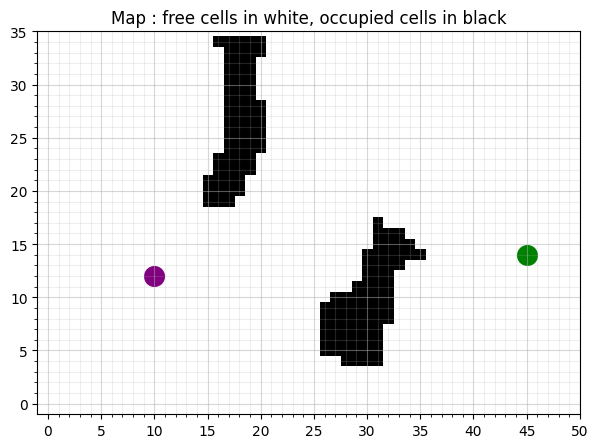

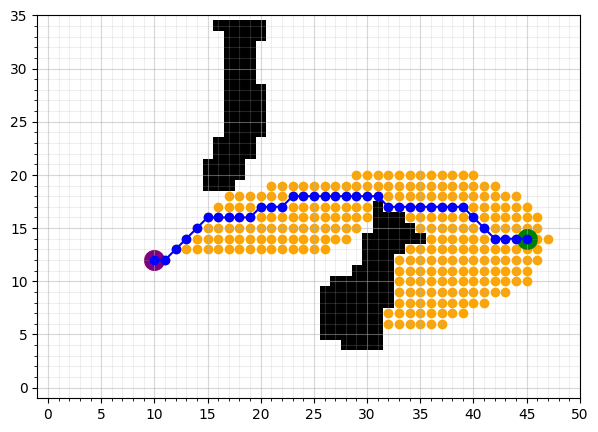

In [4]:
MAP_SHAPE = (1000,700)
REFRAME = True 
cap = cv2.VideoCapture(0)

if REFRAME:
    Tmap = vs.get_warp(cap,MAP_SHAPE,10,1)

while True:
    ret,frame = cap.read()
    if ret:
        # maps capture to map
        if REFRAME:
            frame = cv2.warpPerspective(frame,Tmap,MAP_SHAPE)
        # maps BGR to HLS color space for simplicity
        HLS = cv2.cvtColor(frame, cv2.COLOR_BGR2HLS_FULL)
        
    
        fmap = vs.get_grid_fixed_map(frame,(50,35),50)
        
        # find dest position
        dest = gb.convert_to_idx([coord / 10.0 for coord in vs.get_destination(frame)],2)
        
        if not (dest ==[0,0]):
            dest[1]= 35-dest[1]
            dest = tuple(dest)
        #dest = gb.convert_to_idx(vs.get_destination(frame)/10.0, 2)
        # find robot
            gotpos,robpos,pxpcm,orient = vs.get_Robot_position_orientation(HLS,5)
            if gotpos : 
                start = gb.convert_to_idx(robpos/10.0,2)
                start[1]= 35-start[1]
                start = tuple(start)
                path = gb.global_final(fmap,start,dest, "8N", True)
                break
        

In [4]:
dest

[16, 18]

In [7]:


while True:
    ret,frame = cap.read()
    Tmap = vs.get_warp(cap,MAP_SHAPE,10,1)
    if ret:
        # maps capture to map
        if REFRAME:
            frame = cv2.warpPerspective(frame,Tmap,MAP_SHAPE)
        # maps BGR to HLS color space for simplicity
        HLS = cv2.cvtColor(frame, cv2.COLOR_BGR2HLS_FULL)

        bool_pos ,center,scale,orient = vs.get_Robot_position_orientation(HLS, 5)
        if bool_pos : 
            center_idx = th.convert_to_idx(center, 20)
            center_idx[1] = 35-center_idx[1]
            center = center/10.0
            center[1] = 35- center[1]
            print(center_idx)
        #if gb.test_if_goal(center, path[-1]):
             #break
            check_point = gb.next_checkpoint(path, center_idx)
            await th.move_to_goal(client, np.append(center, orient), check_point, 100)



    

Computing warp matrix
Finished Warp Matrix computation.
[45, 14]
4.176349014157401
Computing warp matrix
Finished Warp Matrix computation.
[44, 14]
4.13040435834928
Computing warp matrix
Finished Warp Matrix computation.
[44, 15]


TypeError: 'NoneType' object is not subscriptable

In [17]:
x = np.array([22, 34])
x/10

array([2.2, 3.4])

In [18]:
x[0]

22

In [11]:
#To unlock the Robot
await node.unlock()

{'error_code': 2}

In [ ]:
await stop_motor()

In [ ]:
#MAIN CODE 1: 

global goal_reached=False
motor_speed=100
#Parameters to control the state of the the local avoidance
local_obstacle=False
threshold_obst=3500

#Function to check if we are close to the current Target : 
epsilon=20
def close_to_target(pos_est,goal,epsilon): #Pos_est is the estimated position from the Kalman filter
    # Calculate distance to current goal
    disp_vector = goal - pos_est
    dist_to_goal = math.sqrt((disp_vector[0])**2 + (disp_vector[1])**2)
    if dist_to_goal<epsilon:
        return True
    else: 
        return False


#Our main function
async def main():
    global local_obstacle
    while(counter=!len(path)):#The program stops when the thymio reached the final goal 
        #To get the last values from the proximity sensors
        sens = await get_proximity_values()
        if (sum(sens[i] > threshold_obst for i in range(0, 5)) > 0):
            local_obstacle = True
            start_time = time.time()

        if(local_obstacle):
            await ln.local_navigation()
            #if the current goal is right next to the local obstacle, we target the next position of the path
            if(close_to_target(pos_est,goal,300)):
                counter+=1  
            local_obstacle=False

        if not local_obstacle: 
            th.move_to_goal(client, x_est, goal, motor_speed)


    if counter == (len(path)):
        await th.stop_motors()
        print("Final goal reached")
        goal_reached=True
        pass
            


while(not goal_reached):
    await main()